<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Advanced_Computer_Vision_Face_Mask_Prediction_using_UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Advanced Computer Vision Project - Face Mask Prediction using U-Net##
## Project Description: ##
In this hands-on project, the goal is to build a Face Mask Segmentation model which includes building a face detector to locate the position of a face in an image.



## Dataset##


## Data Description:##
WIDER FACE dataset is a Face Mask Segmentation benchmark dataset, of which
images are selected from the publicly available WIDER dataset.
This data have 32,203 images and 393,703 faces are labeled with a high degree of
variability in scale, pose and occlusion as depicted in the sample images.

Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab


In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [ ]:
import random
random.seed(0)
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Add path to the folder where your dataset files are

In [ ]:
project_path = '/content/drive/My Drive/Data/'

### Load the "images.npy" file
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
data = np.load(project_path +'images.npy',allow_pickle=True)

### Check one sample from the loaded "images.npy"

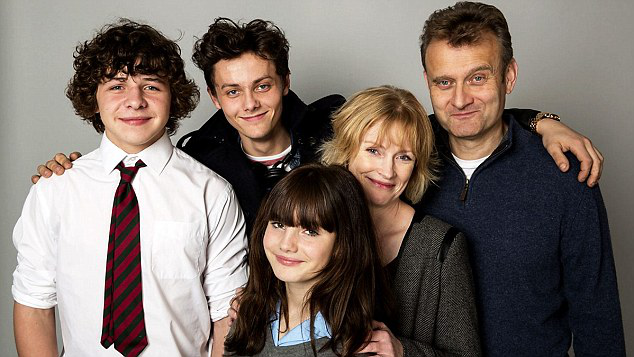

In [ ]:
from PIL import Image
im = Image.fromarray(data[6][0])
im

In [ ]:
data[6][0] # in array

array([[[149, 149, 139],
        [149, 149, 139],
        [152, 152, 142],
        ...,
        [145, 142, 135],
        [146, 143, 136],
        [146, 143, 136]],

       [[149, 149, 139],
        [150, 150, 140],
        [153, 153, 143],
        ...,
        [145, 142, 135],
        [146, 143, 136],
        [146, 143, 136]],

       [[150, 150, 140],
        [151, 151, 141],
        [153, 153, 143],
        ...,
        [146, 143, 136],
        [147, 144, 137],
        [147, 144, 137]],

       ...,

       [[124, 125, 119],
        [126, 127, 121],
        [127, 128, 122],
        ...,
        [ 72,  68,  59],
        [ 70,  65,  59],
        [ 70,  65,  61]],

       [[123, 124, 118],
        [125, 126, 120],
        [127, 128, 122],
        ...,
        [ 70,  66,  57],
        [ 70,  65,  59],
        [ 70,  65,  61]],

       [[123, 124, 118],
        [125, 126, 120],
        [127, 128, 122],
        ...,
        [ 69,  65,  56],
        [ 69,  64,  58],
        [ 69,  64,  60]]

### Set image dimensions
- Initialize image height, image width with value: 224

In [ ]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224


### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img , dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Split the data into training and testing
- 400 images in training
- 9 images in testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,masks, test_size = 0.02, random_state = 0)

Training data

In [ ]:
X_train = np.array(X_train.astype('float32'))
y_train = np.array(y_train.astype('float32'))
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')

X_train: (400, 224, 224, 3)
y_train: (400, 224, 224)


Testing data

In [ ]:
X_test = np.array(X_test.astype('float32'))
y_test = np.array(y_test.astype('float32'))
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_test: (9, 224, 224, 3)
y_test: (9, 224, 224)


In [ ]:
print(f'images in training: {len(X_train)}')
print(f'images in test data: {len(X_test)}')

images in training: 400
images in test data: 9


### Print a sample training image, image array and its mask

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AxesImage(54,36;334.8x217.44)


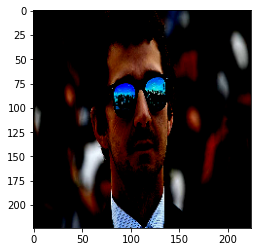

In [ ]:
import matplotlib.pyplot as plt
print(f'{plt.imshow(X_train[1])}')

In [ ]:
X_train[1]

array([[[-0.20784312, -0.4352941 , -0.5764706 ],
        [-0.14509803, -0.38823527, -0.56078434],
        [-0.12156862, -0.38039213, -0.56078434],
        ...,
        [-0.16862744, -0.3490196 , -0.25490195],
        [-0.1372549 , -0.34117645, -0.23921567],
        [-0.12156862, -0.3490196 , -0.23921567]],

       [[-0.19215685, -0.41960782, -0.56078434],
        [-0.12941176, -0.372549  , -0.54509807],
        [-0.09803921, -0.36470586, -0.54509807],
        ...,
        [-0.16862744, -0.35686272, -0.27058822],
        [-0.1372549 , -0.34117645, -0.26274508],
        [-0.09019607, -0.32549018, -0.23137254]],

       [[-0.19215685, -0.41960782, -0.56078434],
        [-0.12156862, -0.36470586, -0.5372549 ],
        [-0.09803921, -0.35686272, -0.5372549 ],
        ...,
        [-0.1607843 , -0.3490196 , -0.3098039 ],
        [-0.12156862, -0.34117645, -0.30196077],
        [-0.0745098 , -0.31764704, -0.27058822]],

       ...,

       [[-0.654902  , -0.7647059 , -0.8509804 ],
        [-0

Print the mask

AxesImage(54,36;334.8x217.44)


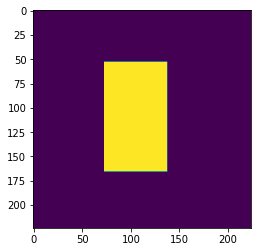

In [ ]:
print(f'{plt.imshow(y_train[1])}') # printing masks image

In [ ]:
print(f' Numpy array :\n{y_train[1]}') # printing masks in numpy array

 Numpy array :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Create the model
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer("conv_pw_1_relu").output
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4) , block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
    x = UpSampling2D()(x)

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function
- Give trainable=True as argument

In [ ]:
model = create_model(trainable=True)


### Print model summary

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

### Define dice coefficient function
- Create a function to calculate dice coefficient


In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function

In [ ]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compile the model
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
optimizer = Adam(lr=1e-4,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define callbacks
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)

stop = EarlyStopping(monitor="val_loss", patience=5)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

callbacks = [stop,reduce_lr,checkpoint]

### Fit the model
- Fit the model using below parameters
  - epochs: 20
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=20, batch_size=1,callbacks = [callbacks])

Epoch 1/20
399/400 [============================>.] - ETA: 0s - loss: 1.3881 - dice_coefficient: 0.4376WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0030s vs `on_test_batch_end` time: 0.0143s). Check your callbacks.

Epoch 00001: val_loss improved from inf to 1.14233, saving model to model-1.14.h5
400/400 [==============================] - 19s 48ms/step - loss: 1.3884 - dice_coefficient: 0.4371 - val_loss: 1.1423 - val_dice_coefficient: 0.5233
Epoch 2/20
399/400 [============================>.] - ETA: 0s - loss: 0.8045 - dice_coefficient: 0.6073
Epoch 00002: val_loss did not improve from 1.14233
400/400 [==============================] - 19s 47ms/step - loss: 0.8058 - dice_coefficient: 0.6066 - val_loss: 1.1732 - val_dice_coefficient: 0.5058
Epoch 3/20
399/400 [============================>.] - ETA: 0s - loss: 0.6234 - dice_coefficient: 0.6760
Epoch 00003: val_loss improved from 1.14233 to 0.91073, saving model to model-0.91.h

### Get the predicted mask for a test image

In [ ]:
model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 2ms/step - loss: 0.7303 - dice_coefficient: 0.6814


[0.7302905917167664, 0.6813592314720154]

In [ ]:
# Let's check if its predicted properly
preds = model.predict(X_test, verbose=1)

1/1 [==============================] - 0s 143ms/step


In [ ]:
#Get the threshold predictions to look at refined results.
preds_val = (preds > 0.5).astype(np.uint8)

In [ ]:
#Plot a sample
def plot_sample(X, y, preds, binary_preds, ix=None):
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Seismic')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Salt')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Salt Predicted')

    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Salt Predicted binary');

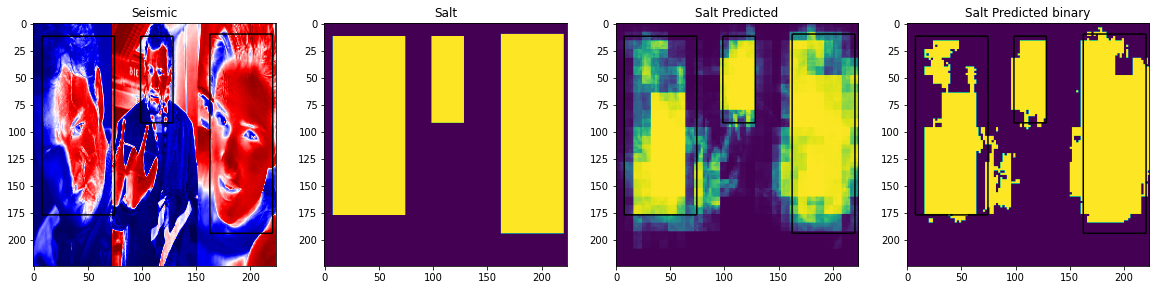

In [ ]:
# Check if valid data looks all right
plot_sample(X_test, y_test, preds, preds_val, ix=7)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original Image : AxesImage(54,36;334.8x217.44)


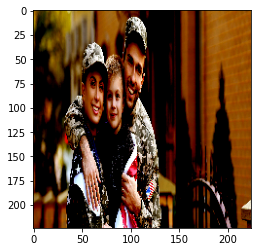

In [ ]:
print(f'Original Image : {plt.imshow(X_test[1])}')

Show original mask for test image

AxesImage(54,36;334.8x217.44)


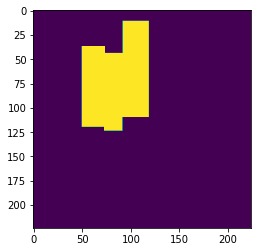

In [ ]:
print(f'{plt.imshow(np.squeeze(y_test[1]))}')

Predict the mask on the test image

Prediction Image : AxesImage(54,36;334.8x217.44)


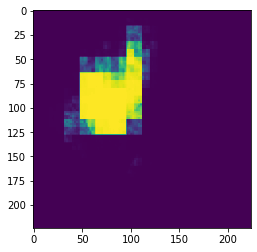

In [ ]:
print(f'Prediction Image : {plt.imshow(preds[1])}')

### Impose the mask on the test image
- In imshow use the alpha parameter and set it to greater than 0.5

AxesImage(54,36;334.8x217.44)


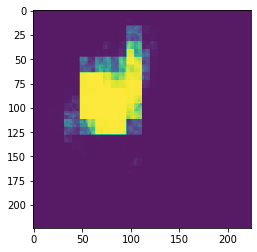

In [ ]:
print(f'{plt.imshow(preds[1],alpha=0.9)}')


### Call the create_model function
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [ ]:
model1 = create_model(trainable=False)
model1.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
#model compile
model1.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

In [ ]:
# Fit the model
model1.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=20, batch_size=1,callbacks = [callbacks])

Epoch 1/20
399/400 [============================>.] - ETA: 0s - loss: 2.1954 - dice_coefficient: 0.2381WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0034s vs `on_test_batch_end` time: 0.0145s). Check your callbacks.

Epoch 00001: val_loss did not improve from 0.74478
400/400 [==============================] - 11s 27ms/step - loss: 2.1937 - dice_coefficient: 0.2383 - val_loss: 1.4178 - val_dice_coefficient: 0.3794
Epoch 2/20
398/400 [============================>.] - ETA: 0s - loss: 1.5271 - dice_coefficient: 0.3451
Epoch 00002: val_loss did not improve from 0.74478
400/400 [==============================] - 10s 26ms/step - loss: 1.5257 - dice_coefficient: 0.3455 - val_loss: 1.2205 - val_dice_coefficient: 0.4344
Epoch 3/20
400/400 [==============================] - ETA: 0s - loss: 1.3213 - dice_coefficient: 0.3972
Epoch 00003: val_loss did not improve from 0.74478
400/400 [==============================] - 10s 25ms/step - loss:

In [ ]:
model1.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 2ms/step - loss: 0.7362 - dice_coefficient: 0.6318


[0.7362381815910339, 0.631797730922699]

Model is not performing very good may be due to less images. The Test accuracy is about 68 percent. however the faces are capture correctly.

Trainable = True is much better then False comparatively [around 68% and 63%.

### Let's build the UNET architecture ###

In [ ]:
from tensorflow.keras.layers import Conv2D ,BatchNormalization,Activation
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)

    return x

In [ ]:
from tensorflow.keras.layers import Input,MaxPooling2D,Dropout,concatenate,Conv2DTranspose
from tensorflow.keras.models import Model
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)

    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    # Middle
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    c5 = conv2d_block(c5, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)

    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)

    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)

    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)

    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [ ]:
input_img = Input((IMAGE_HEIGHT, IMAGE_WIDTH, 3)) # Input parameter
model2 = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True) # calling the UNET model

In [ ]:
# model compile
model2.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

In [ ]:
# Fit the model
model2.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=20, batch_size=1,callbacks = [callbacks])

Epoch 1/20
398/400 [============================>.] - ETA: 0s - loss: 2.2601 - dice_coefficient: 0.2797
Epoch 00001: val_loss did not improve from 0.74478
400/400 [==============================] - 4s 11ms/step - loss: 2.2582 - dice_coefficient: 0.2801 - val_loss: 1.8297 - val_dice_coefficient: 0.2951
Epoch 2/20
399/400 [============================>.] - ETA: 0s - loss: 1.9289 - dice_coefficient: 0.3177
Epoch 00002: val_loss did not improve from 0.74478
400/400 [==============================] - 4s 10ms/step - loss: 1.9269 - dice_coefficient: 0.3182 - val_loss: 1.7204 - val_dice_coefficient: 0.3027
Epoch 3/20
398/400 [============================>.] - ETA: 0s - loss: 1.8102 - dice_coefficient: 0.3330
Epoch 00003: val_loss did not improve from 0.74478
400/400 [==============================] - 4s 10ms/step - loss: 1.8117 - dice_coefficient: 0.3324 - val_loss: 1.6933 - val_dice_coefficient: 0.3330
Epoch 4/20
398/400 [============================>.] - ETA: 0s - loss: 1.7348 - dice_coeffic

In [ ]:
#Evaluate the Model
model2.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 2ms/step - loss: 1.2811 - dice_coefficient: 0.4019


[1.2811148166656494, 0.40186020731925964]

In [ ]:
# Let's check if its predicted properly
preds = model2.predict(X_test, verbose=1)

1/1 [==============================] - 0s 11ms/step


In [ ]:
#Get the threshold predictions to look at refined results.
preds_val = (preds > 0.5).astype(np.uint8)

In [ ]:
#Plot a sample
def plot_sample(X, y, preds, binary_preds, ix=None):
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Seismic')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Salt')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Salt Predicted')

    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Salt Predicted binary');

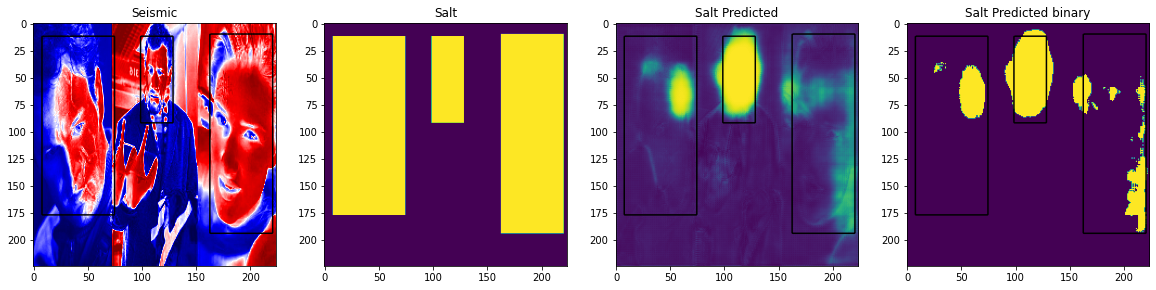

In [ ]:
# Check if valid data looks all right
plot_sample(X_test, y_test, preds, preds_val, ix=7)

In [ ]:
model2.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 224, 224, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 16) 64          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 224, 224, 16) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

The prediction accuracy is bad.This may be due to less data in this project